In [1]:
include("src/Models.jl")
include("src/Params.jl")
include("src/Utils.jl")
using DifferentialEquations
using Plots; gr()

Plots.GRBackend()

Period without growth. Return values `(is_converged, amplitude, period, phase)`

In [2]:
U0 = 3.5
X0 = [U0, 0, 0, 0, 0, 0]
A0 = 1.0
fATP = 1.0
p_rest = [kUTA, kTU, kTUA, kTDA, kDT, kDTA, kDS, kDSA, kSDA, kSU, kSUA, kUSA, kCIhyd,
     KA, A0, fATP, N, M]
@time attracted_to(kaiabc_growing!, X0, 500, [p_rest..., 1e5, U0])

 14.315421 seconds (22.48 M allocations: 3.089 GiB, 6.52% gc time, 50.55% compilation time)


(true, 0.4630475484019832, 23.203382929202014, 4.938864883926232)

In [3]:
U0 = 3.5
X0 = [U0, 0, 0, 0, 0, 0]
A0 = 1.0
fATP = 1.0
#tau = 6

p_rest = [kUTA, kTU, kTUA, kTDA, kDT, kDTA, kDS, kDSA, kSDA, kSU, kSUA, kUSA, kCIhyd,
     KA, A0, fATP, N, M]

tau_vec = [5:0.01:5.99; 6:0.05:10; 11:19; 20:5:50]
amp_vec = zeros(length(tau_vec))
per_vec = zeros(length(tau_vec))

for i = 1:length(tau_vec)
    println(tau_vec[i])
    # rather large cutoff to aviod picking up damped oscillations
    converge, amp_mean, per_mean, phase = attracted_to(kaiabc_growing!, X0, 500, [p_rest..., tau_vec[i], U0],
                                                        avg_window=64, amp_cutoff=0.01)
    
    amp_vec[i] = amp_mean

    per_vec[i] = per_mean
    println("amplitude: ", amp_mean, ", period: ", per_mean)
end

5.0
amplitude: -1, period: -1
5.01
amplitude: -1, period: -1
5.02
amplitude: -1, period: -1
5.03
amplitude: -1, period: -1
5.04
amplitude: -1, period: -1
5.05
amplitude: -1, period: -1
5.06
amplitude: -1, period: -1
5.07
amplitude: -1, period: -1
5.08
amplitude: -1, period: -1
5.09
amplitude: -1, period: -1
5.1
amplitude: -1, period: -1
5.11
amplitude: -1, period: -1
5.12
amplitude: -1, period: -1
5.13
amplitude: -1, period: -1
5.14
amplitude: -1, period: -1
5.15
amplitude: -1, period: -1
5.16
amplitude: -1, period: -1
5.17
amplitude: -1, period: -1
5.18
amplitude: -1, period: -1
5.19
amplitude: -1, period: -1
5.2
amplitude: -1, period: -1
5.21
amplitude: -1, period: -1
5.22
amplitude: -1, period: -1
5.23
amplitude: -1, period: -1
5.24
amplitude: -1, period: -1
5.25
amplitude: 0.31579131973008523, period: 19.148128046795517
5.26
amplitude: 0.32564495190446724, period: 19.114266099132056
5.27
amplitude: 0.3308901845301174, period: 19.06632611724339
5.28
amplitude: 0.33486966292758835, p

amplitude: 0.4361456039451205, period: 17.734064455485377
8.25
amplitude: 0.43658162782455134, period: 17.7380473913124
8.3
amplitude: 0.43700313225144527, period: 17.752506505597506
8.35
amplitude: 0.43761685985073717, period: 17.762810502604008
8.4
amplitude: 0.4379367872634624, period: 17.77547853939323
8.45
amplitude: 0.4384201908776215, period: 17.786466293950735
8.5
amplitude: 0.4388983963473625, period: 17.795670710164977
8.55
amplitude: 0.43926892810915763, period: 17.805644043934326
8.6
amplitude: 0.4397665341974272, period: 17.821385555701042
8.65
amplitude: 0.4401472732040876, period: 17.827392901752166
8.7
amplitude: 0.4404908972634059, period: 17.836810896800895
8.75
amplitude: 0.4408696534033274, period: 17.850869517018978
8.8
amplitude: 0.44126179745633537, period: 17.863887727167718
8.85
amplitude: 0.4416887563495336, period: 17.875594909599734
8.9
amplitude: 0.44210105184161935, period: 17.886784347933865
8.95
amplitude: 0.4423652797260302, period: 17.898363877187787
9

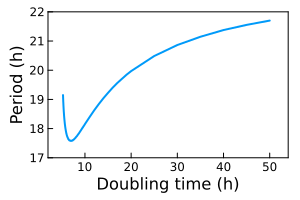

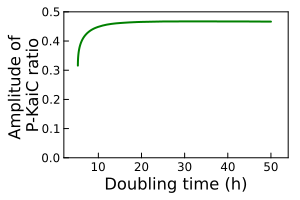

"/home/randolph/Rust_lab/kaiabc/outputs/amp_tau.pdf"

In [28]:
ind = amp_vec .!= -1

plt = plot(tau_vec[ind], per_vec[ind], label="Period", linewidth=2, 
    leg=false, frame=:box, size=(300, 200), grid=false)
xlabel!(plt, "Doubling time (h)")
ylabel!(plt, "Period (h)")
ylims!(plt, (17, 22))
xlims!(plt, (2, 54))
display(plt)
savefig(plt, "outputs/period_tau.pdf")

plt = plot(tau_vec[ind], amp_vec[ind], label="Amplitude", color=:green, linewidth=2, 
    leg=false, frame=:box, grid=false, size=(300, 200))
xlabel!(plt, "Doubling time (h)")
ylabel!(plt, "Amplitude of \nP-KaiC ratio")
ylims!(plt, (0, 0.5))
xlims!(plt, (2, 54))
display(plt)
savefig(plt, "outputs/amp_tau.pdf")

Zoom in to near the bifurcation parameter

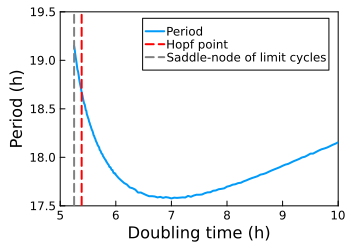

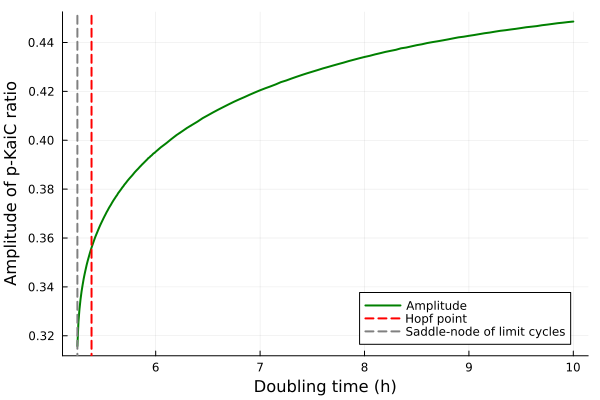

In [42]:
ind_close = ind .&& (tau_vec .<= 10)    # zoom into region close to bifurcations
ind_sd = 1
while ind_sd <= length(ind)
    if ind[ind_sd]
        break
    end
    ind_sd += 1
end

plot(tau_vec[ind_close], per_vec[ind_close], label="Period", linewidth=2, frame=:box,
    size=(350, 250), grid=false)
hopf_tau = 5.385546875
vline!([hopf_tau], color=:red, linewidth=2, linestyle=:dash, label="Hopf point")
vline!(tau_vec[[ind_sd]], color=:gray, linewidth=2, linestyle=:dash, label="Saddle-node of limit cycles")
xlims!(5, 10)
ylims!(17.5, 19.5)
xlabel!("Doubling time (h)") 
ylabel!("Period (h)") |> display
#savefig("outputs/period_tau_zoom.pdf")

plot(tau_vec[ind_close], amp_vec[ind_close], label="Amplitude", color=:green, linewidth=2)
vline!([hopf_tau], color=:red, linewidth=2, linestyle=:dash, label="Hopf point")
vline!(tau_vec[[ind_sd]], color=:gray, linewidth=2, linestyle=:dash, label="Saddle-node of limit cycles")
xlabel!("Doubling time (h)") 
ylabel!("Amplitude of p-KaiC ratio") |> display

In [20]:
_, _, per, _ = attracted_to(kaiabc_phong!, X0, 500.0, p_rest)
per

23.206683057329435

Example trajectory

Here the phase point is trapped in the *ghost* of a limit cycle (a stable and an unstable limit cycle already collided and annihilated at this point) for a while before it's attracted to the stable spiral

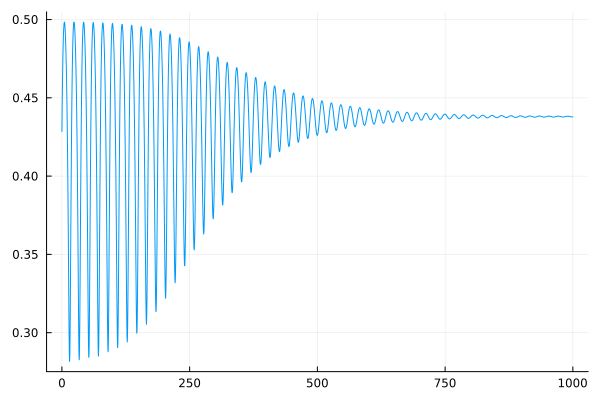

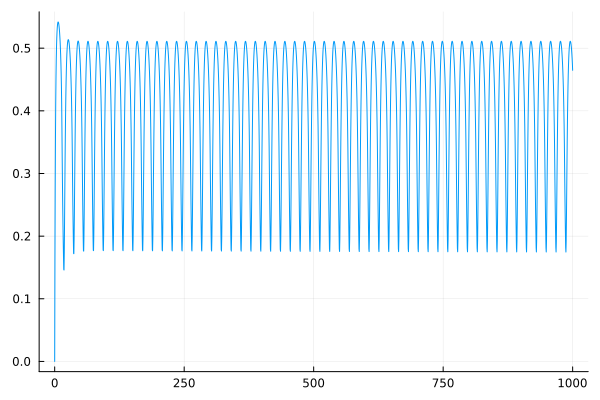

In [47]:
# saddle node of limit cycles estimated to be at 5.245
hopf_tau = 5.385546875
p2 = [p_rest; hopf_tau - 0.1; U0]

X0 = [2.0, 1.0, 0.2, 0.1, 0.1, 0.1]
prob0 = ODEProblem(kaiabc_growing!, X0, (0.0, 1000.0), p2)
sol0 = solve(prob0, reltol=1e-8, abstol=1e-8, saveat=0.5)

display(plot(sol0.t, phospho_C(sol0.u), leg=false))

X1 = [3.5, zeros(5)...]
prob1 = ODEProblem(kaiabc_growing!, X1, (0.0, 1000.0), p2)
sol1 = solve(prob1, reltol=1e-8, abstol=1e-8, saveat=0.5)

display(plot(sol1.t, phospho_C(sol1.u), leg=false))

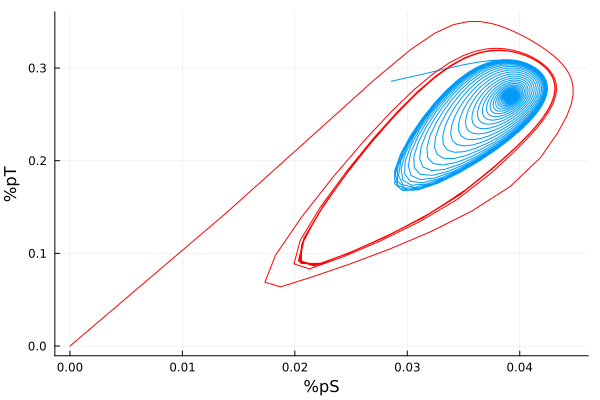

In [45]:
Xt = reduce(hcat, sol0.u)
plot(Xt[4, :]/U0, Xt[2, :]/U0, xlabel="%pS", ylabel="%pT", leg=false)

Xt = reduce(hcat, sol1.u)
plot!(Xt[4, :]/U0, Xt[2, :]/U0, color="red")

## Troubleshooting the Julia code

The bug is here: to write `A + B` in two lines, one should keep the plus sign in line 1, so that the 1st line
will be invalid and Julia reads the 2nd line together as one expression.

Instead I put the plus sign on the 2nd line (`+ B`) which makes both line valid expressions.
Unlike python, Julia doesn't have line continuation syntax.

In [19]:
# x = [1.0, 1.5, 1.0, 0.5, 0.1, 0.1]
# dxdt = zeros(6)
# kaiabc_phong!(dxdt, x, p_rest, 0)